# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#importing all the required libraries

In [2]:
testdata = pd.read_csv("C:\\Users\\rohit\\OneDrive\\Desktop\\Iris Flower Classification\\Data\\IRIS.csv")

In [3]:
testdata

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
testdata.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Null Validation

In [9]:
testdata.isna().sum()
#this indicates that there are no NULL values in the dataset. Hence there is no need for regulation

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Data Visualisation

<AxesSubplot:xlabel='sepal_length', ylabel='count'>

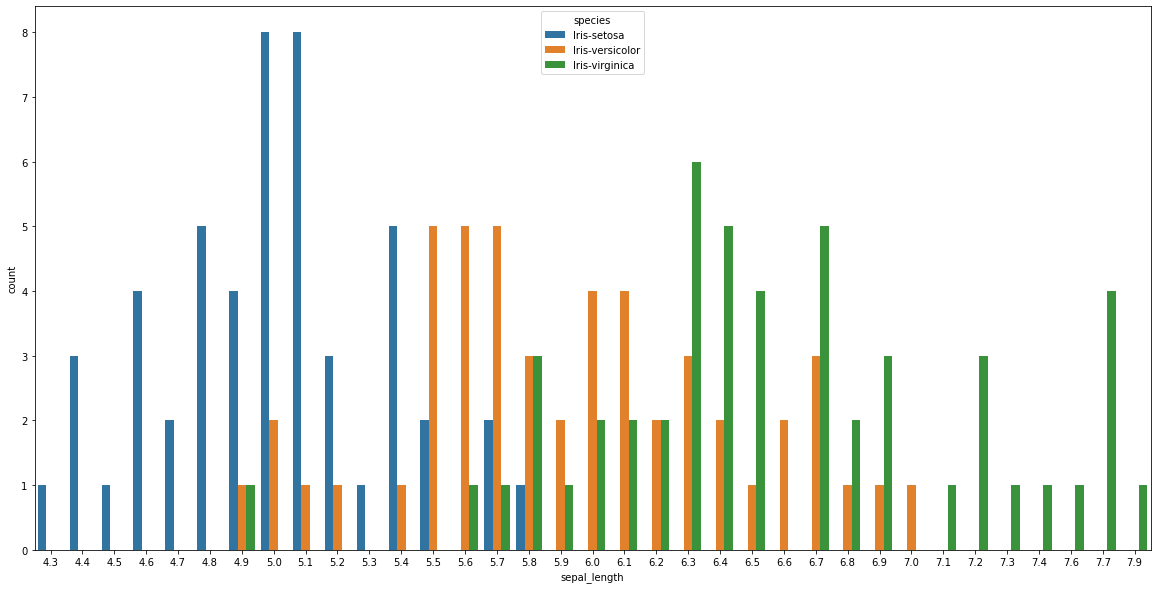

In [13]:
plt.figure(figsize = (20,10))
sns.countplot(x = testdata['sepal_length'], hue = testdata['species'])
#we are visualizing how the frequency of a particular sepal length is varying for the three different species
#Iris-virginicas have higher sepal lengths and Iris-setosas have lower sepal lengths

<AxesSubplot:xlabel='sepal_width', ylabel='count'>

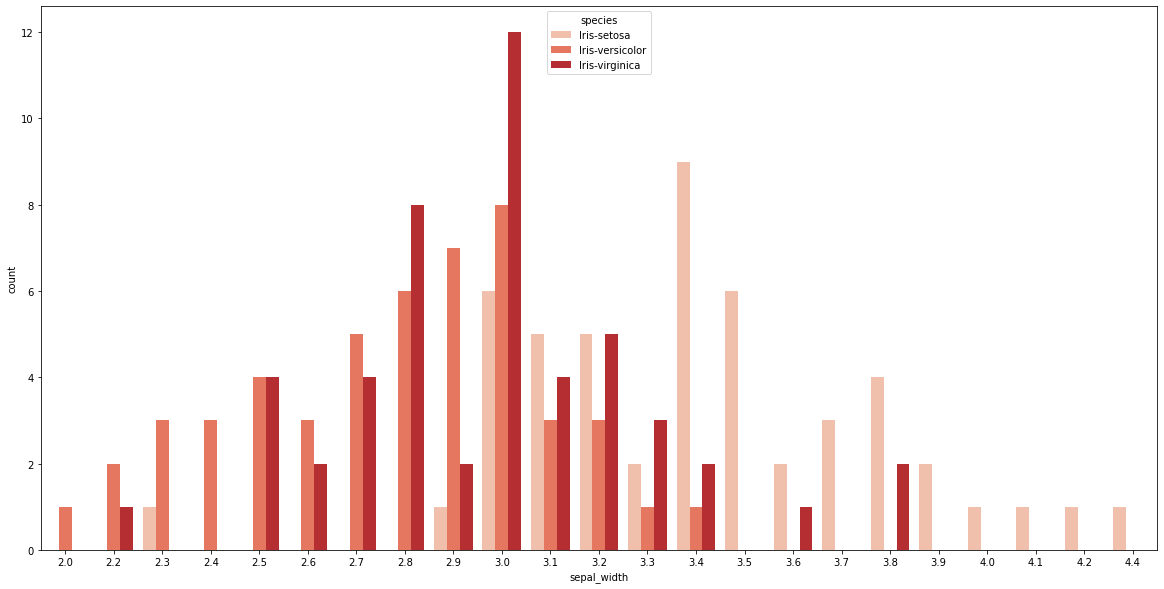

In [16]:
plt.figure(figsize = (20,10))
sns.countplot(x = testdata['sepal_width'], hue = testdata['species'], palette = 'Reds')
#here we see the contrast between sepal height and width as Iris-setosas are the widest species of the three whereas Iris-versicolor lies on the thinner end.

<AxesSubplot:xlabel='petal_length', ylabel='count'>

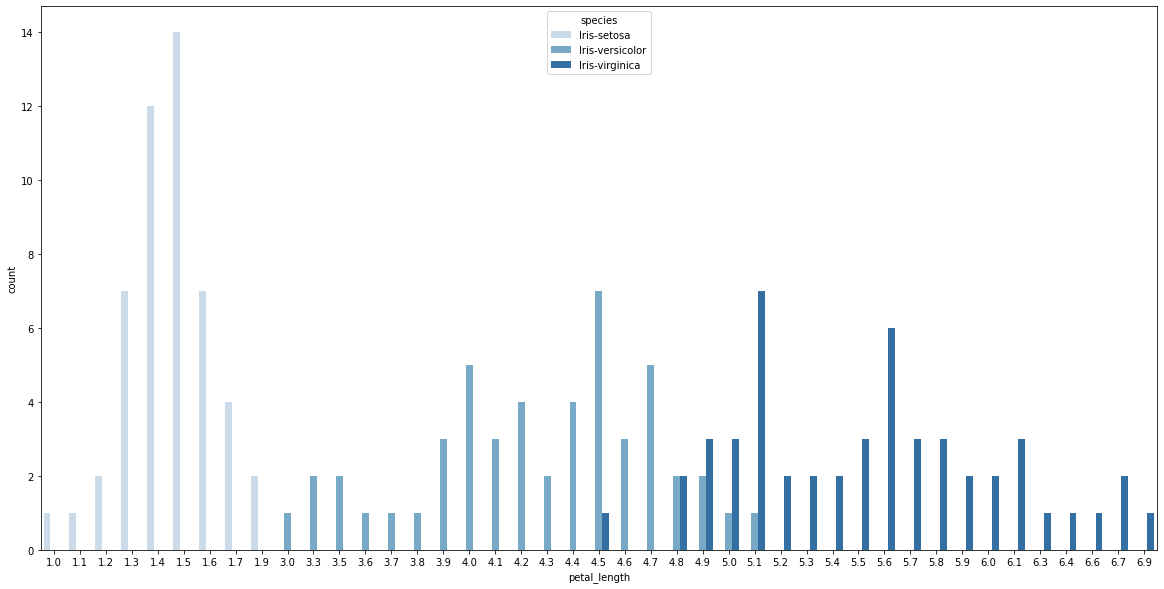

In [19]:
plt.figure(figsize = (20,10))
sns.countplot(x = testdata['petal_length'], hue = testdata['species'], palette = 'Blues')

<AxesSubplot:xlabel='petal_width', ylabel='count'>

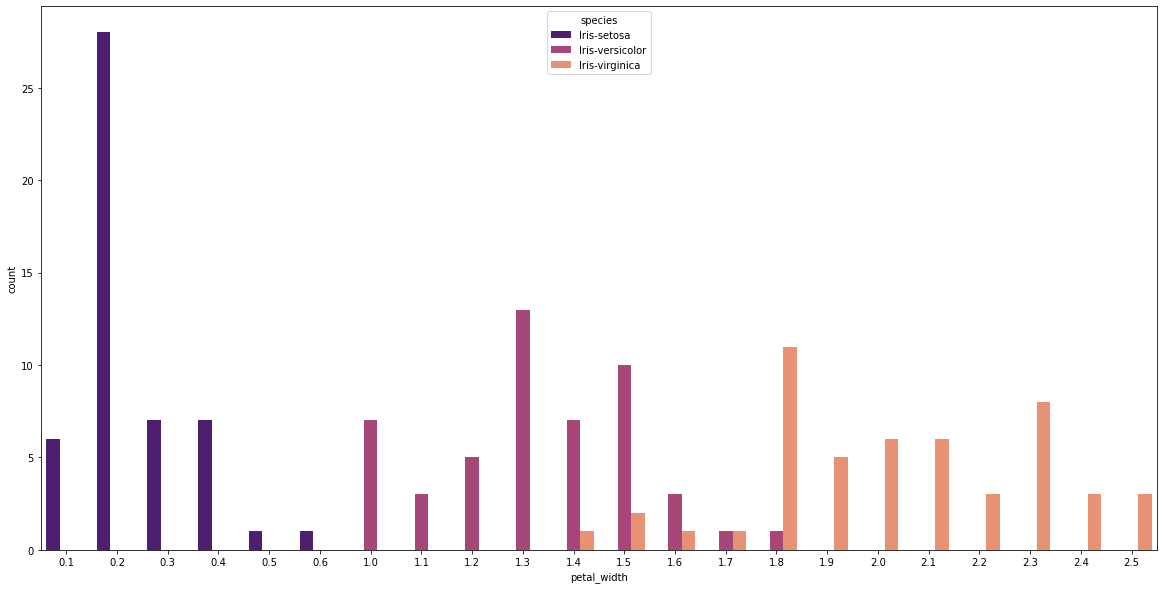

In [22]:
plt.figure(figsize = (20,10))
sns.countplot(x = testdata['petal_width'], hue = testdata['species'], palette = 'magma')

In [32]:
#from the above two countplots we can conclude that bigger petals (both length and width) belong to Iris-virginica, medium sized ones belong to Iris-versicolors and smaller ones belong to Iris-setosas

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

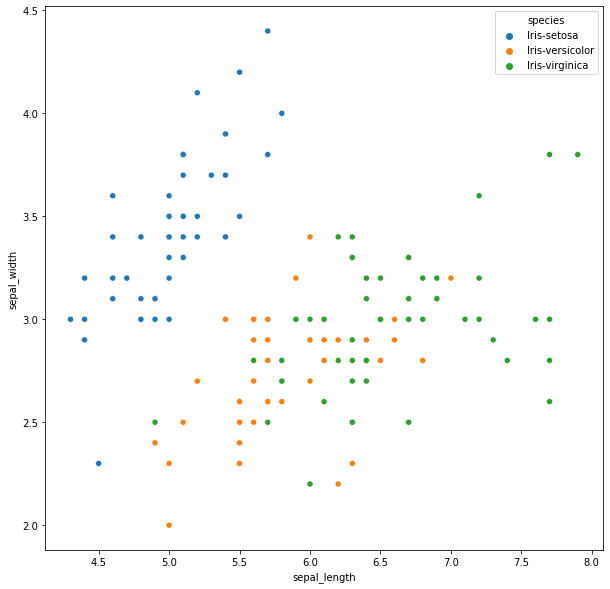

In [35]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'sepal_length', y = 'sepal_width', data = testdata, hue = 'species')
#The scatterplot indicates that lower sepal length and higher sepal width region belongs to Iris-setosa
#Medium sepal length and width region belongs to Iris-versicolor
#Higher sepal length and medium sepal width region belongs to Iris-verginica

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

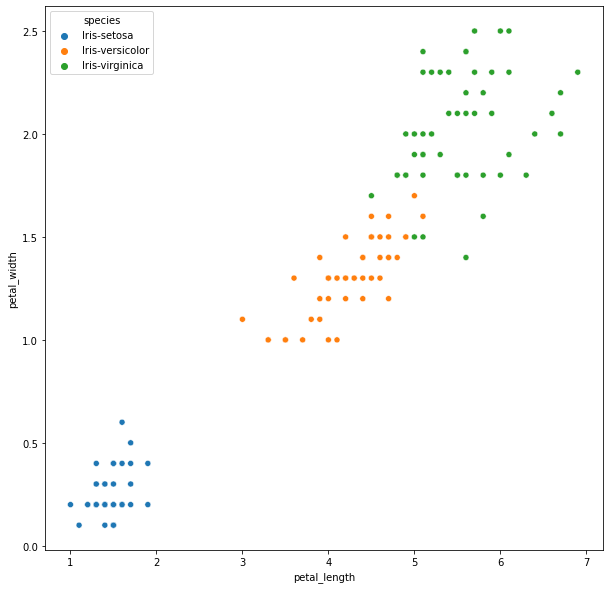

In [36]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'petal_length', y = 'petal_width', data = testdata, hue = 'species')
#The scatterplot indicates that smaller petal size (both width and length) belong to Iris-setosa
#Medium petal size belongs to Iris-versicolor
#Bigger petal size belongs to Iris-virginica

# Training the model

In [37]:
#we will be using different functions to train the model and test its accuracy

In [38]:
predictors = testdata.drop(['species'], axis = 1)
predictors

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [40]:
target = testdata['species']
target

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(predictors,target,test_size=0.33, random_state=0)

In [53]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_logreg)

98.0


In [52]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
Y_pred = decision_tree.predict(x_test)
acc_dectree = round(accuracy_score(Y_pred, y_test) * 100, 2)
print(acc_dectree)

96.0


In [54]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(x_train,y_train)
Y_pred = linear_svc.predict(x_test)
acc_linear_svc = round(accuracy_score(Y_pred, y_test) * 100, 2)
print(acc_linear_svc)

94.0


C:\Users\rohit\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [56]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train,y_train)
Y_pred = random_forest.predict(x_test)
acc_random_forest = round(accuracy_score(Y_pred, y_test) * 100, 2)
print(acc_random_forest)

96.0


In [57]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Linear SVC', 'Decision Tree'],
    'Score': [acc_logreg, acc_random_forest, acc_linear_svc, acc_dectree]})
models.sort_values(by='Score', ascending=False)
models

,Model,Score
0,Logistic Regression,98.0
1,Random Forest,96.0
2,Linear SVC,94.0
3,Decision Tree,96.0


In [ ]:
#from the above dataframe, we can see logistic regression model provides the highest accuracy